In [14]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate

In [5]:
import time
import random
import requests
import webbrowser
import pandas as pd
from bs4 import BeautifulSoup
import urllib.request as urllib2
from urllib.request import Request, urlopen
from PIL import Image, ImageDraw, ImageFont
from tqdm import tqdm_notebook as tqdm
from pandas_datareader import data, wb
import pandas_datareader
import quandl
import os
import glob
import shutil

from alpha_vantage.timeseries import TimeSeries

In [3]:
russ2000 = pd.read_csv('new4.csv')

In [2]:
#!wget https://github.com/JotJunior/PHP-Boleto-ZF2/raw/master/public/assets/fonts/arial.ttf

In [ ]:
htmlPicks = '/Users/AnthonyCelio/tor/junestocks.html'

In [ ]:
soup = BeautifulSoup(open(htmlPicks), "html.parser")

In [ ]:
soup2 = soup.findAll('div', attrs={"class":"tv-screener-table__symbol-right-part"})

In [ ]:
soup2 = BeautifulSoup(soup2, "html.parser")

In [ ]:
type(soup2)

In [ ]:
soup3 = soup2[1].findAll('a')

In [ ]:
soup3[0].text

In [ ]:
zabu = []
for i in soup2:
    xu = i.findAll('a')
    zabu.append(str(xu[0].text))

In [93]:
c[0]

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange,Executives,Y_Comany_Name,Industry_Sector
66,XTSLA,BLK CSH FND TREASURY SL AGENCY,Money Market,0.19,1,"81,956,913","81,956,913.12","81,956,913.12",Cash and/or Derivatives,-,US0669224778,-,"['TSLA', 'Consumer Cyclical', 'NMS', 'THL Cred...",NaN,NaN


In [4]:
Fail

,0
0,XTSLA
1,MOGA
2,ENTA
3,GPI
4,THRM
5,UVV
6,HURN
7,USD
8,CWENA
9,MSFUT


In [1]:
#SCRAPING EXECUTIVE NAMES, SECTOR AND COMPANY INFO
for i in tqdm(range(1000, 2000)):
    try:
    #     req = Request('https://thepiratebay.org/search/lesbea/'+str(io)+'/3//', headers={'User-Agent': 'Mozilla/5.0'})
        req = Request('https://finance.yahoo.com/quote/'+russ2000.loc[i][0]+'/profile?p='+russ2000.loc[i][0],
                      headers={'User-Agent': 'Mozilla/5.0'})
        webpage = urlopen(req).read()
        #time.sleep(random.randint(1, 9) * 0.151 + 1)
        soup = BeautifulSoup(webpage, "html.parser")
        execs = soup.findAll('td', attrs={"class":"Ta(start)"})
        russ2000.at[i, 'Executives'] = [str(i.text) for i in execs[::2]]
        russ2000.at[i, 'Y_Comany_Name'] = str(soup.findAll('h3', attrs={'class':'Fz(m) Mb(10px)'})[0].text)
        russ2000.at[i, 'Industry_Sector'] = [i.text for i in soup.findAll('span', attrs={"class":"Fw(600)"})][:2]
    except:
        Fail.append(russ2000.loc[i][0])
        pass

In [34]:
execsT

['Five Below, Inc.',
 'Mr. Joel D. Anderson',
 'Mr. Kenneth R. Bull',
 'Mr. Eric M. Specter',
 'Mr. Michael F. Romanko',
 'Mr. George S. Hill']

### CREATING PHOTOS FOR EACH COMPANY'S DATA

In [13]:
img = Image.new('RGB', (224, 224), color = (255,255,255))
H = 0
font_size = 15
d = ImageDraw.Draw(img)
for i in sector[:2]:
    fnt = ImageFont.truetype('arial.ttf', font_size)
    d.text((3, H), str(i.text), font=fnt, fill=(255,69,0, 15))
    H += font_size + 0.5
img = img.rotate(270)

In [14]:
H = 0
font_size = 21
d = ImageDraw.Draw(img)
for i in execsT:
    fnt = ImageFont.truetype('arial.ttf', font_size)
    d.text((3, H), i, font=fnt, fill=(0, 0, 0))
    H += font_size + 0.5
    font_size = 14

In [15]:
img.save('pil_text.png')

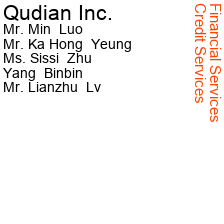

In [16]:
img

In [221]:
foo = russ2000.loc[0, 'Executives']
foo = foo.replace('[', '')
foo = foo.replace(']', '')
foo = foo.replace('\'', '')

In [223]:
foo.split(',')

['Mr. Ron  Squarer',
 ' Mr. Jason  Haddock',
 ' Mr. Andrew R. Robbins',
 ' Dr. Victor  Sandor',
 ' Dr. Nicholas A. Saccomano']

In [214]:
russ2000.loc[0, 'Executives'].split(',')

["['Mr. Ron  Squarer'",
 " 'Mr. Jason  Haddock'",
 " 'Mr. Andrew R. Robbins'",
 " 'Dr. Victor  Sandor'",
 " 'Dr. Nicholas A. Saccomano']"]

In [296]:
for zz in tqdm(range(len(russ2000))):
    img = Image.new('RGB', (224, 224), color = (255,255,255))
    H = 0
    font_size = 15
    d = ImageDraw.Draw(img)
    foo1 = russ2000.loc[zz, 'Industry_Sector'].replace('[', '')
    foo2 = foo1.replace(']', '')
    foo3 = foo2.replace('\'', '')
    foo4 = foo3.split(', ')
    for i in foo4:
        fnt = ImageFont.truetype('arial.ttf', font_size)
        d.text((3, H), i, font=fnt, fill=(255,69,0, 15))
        H += font_size + 0.5
    img = img.rotate(270)

    H = 0
    d = ImageDraw.Draw(img)
    foo1 = russ2000.loc[zz, 'Executives'].replace('[', '')
    foo2 = foo1.replace(']', '')
    foo3 = foo2.replace('\'', '')
    foo4 = foo3.split(', ')
    for i in foo4:
        fnt = ImageFont.truetype('arial.ttf', 14)
        d.text((3, H), i, font=fnt, fill=(0, 0, 0))
        H += 14 + 0.5

    fnt = ImageFont.truetype('arial.ttf', 16)
    d.text((3, 200), russ2000.loc[zz, 'Y_Comany_Name'], font=fnt, fill=(0, 0, 0))
    img.save('./photos/'+russ2000.loc[zz, 'Ticker']+'.png')

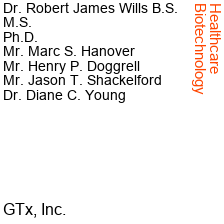

In [311]:
img

## NEXT GRAB COMPANY LOGOS FROM 1ST IMAGE RESULT FOR "COMPANY NAME> LOGO"

In [ ]:
# GOOGLE IMAGE SCRAPER
stl = []
#ra = random.randint(20, (len(russ2000)))
for i in tqdm(range(1253, 1254)): # len(russ2000))):
    #i = 755
    company_name = '+'.join(russ2000.loc[i][1].split(' ')[:4])+'+'
    glink = 'https://www.google.com/search?rlz=1C5CHFA_enUS729US729&biw=356&bih=618&tbm=isch&sa=1&ei=RKcTXcPAIZTPtQaaqqWwDQ&q='+company_name+'logo&oq='+company_name+'logo&oq=ARRAY+BIOPHARMA+INC+logo&gs_l=img.3...127578.127578..128075...0.0..0.138.138.0j1......0....2j1..gws-wiz-img.KVMeC2AgRWg'
    req = Request(glink, headers={'User-Agent': 'Mozilla/5.0'})
    webpage = urlopen(req).read()
    soup = BeautifulSoup(webpage, "html.parser")
    zazo = soup.findAll('img')[0]['src']
    img_name = russ2000.loc[i][0]+'.png'
    urllib2.urlretrieve(zazo, img_name)
    img = Image.open(img_name)
    foreground = Image.open('/home/rocky/Projects/Stock_Execs/photos/'+img_name)
    img.putalpha(160)
    foreground.paste(img, (112 - int(img.size[0]/2), 142 - int(img.size[1]/2)), img)
    foreground.save('/home/rocky/Projects/Stock_Execs/photos_w_logos/'+russ2000.loc[i][0]+'.png')

458


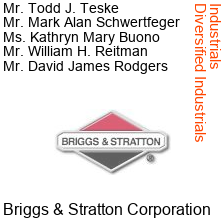

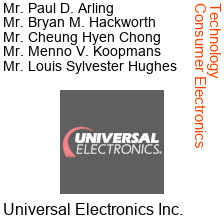

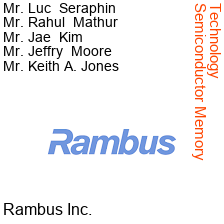

In [6]:
rn = random.randint(0, len(russ2000))
imgcheck = Image.open(glob.glob('/home/rocky/Projects/Stock_Execs/photos_w_logos/*.png')[rn])
imgcheck2 = Image.open(glob.glob('/home/rocky/Projects/Stock_Execs/photos_w_logos/*.png')[rn+1])
imgcheck3 = Image.open(glob.glob('/home/rocky/Projects/Stock_Execs/photos_w_logos/*.png')[rn+2])
print(rn)
imgcheck
display(imgcheck, imgcheck2, imgcheck3)

In [281]:
russ2000['Tradingview Bull'] = 0

In [303]:
russ2000

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange,Executives,Y_Comany_Name,Industry_Sector,Score,Tradingview Bull
0,ARRY,ARRAY BIOPHARMA INC,Equity,0.48,46.20,"4,391,887","202,905,179.4","202,905,179.4",Health Care,2678654,US04269X1054,NASDAQ,"['Mr. Ron Squarer', 'Mr. Jason Haddock', 'Mr...",Array BioPharma Inc.,"['Healthcare', 'Biotechnology']",143754,4
1,TTD,TRADE DESK INC CLASS A,Equity,0.40,241.34,"692,703","167,176,942.02","167,176,942.02",Information Technology,BD8FDD1,US88339J1051,NASDAQ,"['Mr. Jeffrey Terry Green', 'Mr. David R. Pick...","The Trade Desk, Inc.","['Technology', 'Software - Application']",1,0
2,ETSY,ETSY INC,Equity,0.39,65.78,"2,483,715","163,378,772.7","163,378,772.7",Consumer Discretionary,BWTN5N1,US29786A1060,NASDAQ,"['Mr. Joshua G. Silverman', 'Ms. Rachel C. Gla...","Etsy, Inc.","['Consumer Cyclical', 'Specialty Retail']",148799,0
3,FIVE,FIVE BELOW INC,Equity,0.35,131.29,"1,134,785","148,985,922.65","148,985,922.65",Consumer Discretionary,B85KFY9,US33829M1018,NASDAQ,"['Mr. Joel D. Anderson', 'Mr. Kenneth R. Bull'...","Five Below, Inc.","['Consumer Cyclical', 'Specialty Retail']",137367,0
4,COUP,COUPA SOFTWARE INC,Equity,0.35,126.72,"1,158,406","146,793,208.32","146,793,208.32",Information Technology,BD87XR1,US22266L1061,NASDAQ,"['Mr. Robert Bernshteyn', 'Mr. Todd R. Ford',...",Coupa Software Incorporated,"['Technology', 'Software - Infrastructure']",1,0
5,PLNT,PLANET FITNESS INC CLASS A,Equity,0.33,76.01,"1,837,527","139,670,427.27","139,670,427.27",Consumer Discretionary,BYSFJV8,US72703H1014,New York Stock Exchange Inc.,"['Mr. Christopher J. Rondeau', 'Mr. Dorvin Don...","Planet Fitness, Inc.","['Consumer Cyclical', 'Leisure']",1,0
6,HUBS,HUBSPOT INC,Equity,0.33,178.76,"770,021","137,648,953.96","137,648,953.96",Information Technology,BR4T3B3,US4435731009,New York Stock Exchange Inc.,"['Mr. Brian Halligan J.D.', 'Mr. J. Donald Sh...","HubSpot, Inc.","['Technology', 'Software - Application']",141350,0
7,CIEN,CIENA CORP,Equity,0.31,43.52,"2,977,947","129,600,253.44","129,600,253.44",Information Technology,B1FLZ21,US1717793095,New York Stock Exchange Inc.,"['Dr. Patrick H. Nettles', 'Mr. Gary B. Smith'...",Ciena Corporation,"['Technology', 'Communication Equipment']",115615,0
8,HAE,HAEMONETICS CORP,Equity,0.30,117.45,"1,067,157","125,337,589.65","125,337,589.65",Health Care,2401195,US4050241003,New York Stock Exchange Inc.,"['Mr. Christopher Simon', 'Mr. William P. Bur...",Haemonetics Corporation,"['Healthcare', 'Medical Instruments & Supplies']",130662,4
9,WWD,WOODWARD INC,Equity,0.30,112.24,"1,115,000","125,147,600","125,147,600",Industrials,2948089,US9807451037,NASDAQ,"['Mr. Thomas A. Gendron', 'Mr. Robert F. Weber...","Woodward, Inc.","['Industrials', 'Aerospace & Defense']",116670,0


In [230]:
russ2000.loc[33][0]

'NXST'

In [280]:
above3[0]

'MSFT'

In [288]:
above3.sort()

In [301]:
len(above7)

87

In [302]:
for i in tqdm(range(len(russ2000))):
    for x in above7:
        if x == russ2000.loc[i][0]:
            print('zazu '+ x + ' ' + str(i))
            russ2000.at[i, 'Tradingview Bull'] = 4

zazu ARRY 0
zazu HAE 8
zazu GNRC 51
zazu ROLL 68
zazu GBT 99
zazu TREE 106
zazu SAM 163
zazu RH 271
zazu MRTX 277
zazu BID 325
zazu XNCR 424
zazu IIPR 633
zazu WRLD 693
zazu USNA 722
zazu MLAB 813
zazu GTHX 922



In [273]:
#TRYING TO GET FIVE YEARS OF DATA AND CREATE RANKING SYSTEM BY 1 YEAR AVERAGE PRICES DIFFERENCES
#API CUT ME OFF, SO CREATED CLASSES FROM COPY/PASTING FROM A STOCK SCREENER

not_for_five = []
for po in tqdm(range(len(russ2000))):
    try:
        stock = russ2000.loc[po][0]
        stocko = pandas_datareader.DataReader(stock, 'stooq').reset_index(drop=True)
        gg = list(stocko['Open'])
        zerp = 0
        zerp251 = 251
        five_year_averages = []
        for i in range(5):
            one = gg[zerp:zerp251]
            five_year_averages.insert(0, sum(one)/len(one))
            zerp += 251
            zerp251 += 251
            teege = []
        for i in range(4):
            teege.append(five_year_averages[i+1]/five_year_averages[i])
        russ2000.at[po, 'Score'] = 1e+5 * sum(teege)/len(teege)
    except:
        not_for_five.append(stock)

In [51]:
if len(stock) > (trading_year * 5):
    print(stock[:1]['Open'][0]/stock.iloc[trading_year * 2][0])

1.1701242644983956


In [47]:
ge.iloc[trading_year * 2][0]

26.545

In [29]:
365*3

1095

In [37]:
goog.reset_index(inplace=True)

In [44]:
trading_year = 251

In [43]:
goog.query('Date=="2018-06-22"')

,Date,Open,High,Low,Close,Volume
251,2018-06-22,1159.14,1162.5,1147.26,1155.48,1310967


In [11]:
goog = pandas_datareader.DataReader('GOOG', 'stooq')

In [21]:
goog[:-1]['Open'][0]/goog[-1:]['Open'][0]

1.971144366197183

In [14]:
goog[:-1]['Open'][0]

1119.61

In [ ]:
#CREATE CLASSES WITH RANKINGS BY 'INSPECTING ELEMENT' OF STOCK FILTER RESULTS AND PASTING
# INTO HTML FILES. "BULL RANKING" (AMOUNT STOCK WENT UP) IN OF CLASSES FROM 1 TO 5

bullabove = '/home/rocky/Projects/Stock_Execs/tradingbull/stock_datas/bullabove7.html'
soup = BeautifulSoup(open(bullabove), "html.parser")
soup2 = soup.findAll('div', attrs={"class":"tv-screener-table__symbol-right-part"})
soup3 = soup2[1].findAll('a')
zabu = []
for i in soup2:
    xu = i.findAll('a')
    zabu.append(str(xu[0].text))

In [ ]:
#LIST OF TICKERS IN LIST CLASS 5 ENTERED UNDER CLASS CATAGORY 'Tradingview Bull'
for i in tqdm(range(len(russ2000))):
    for x in zabu:
        if x == russ2000.loc[i][0]:
            print('zazu '+ x + ' ' + str(i))
            russ2000.at[i, 'Tradingview Bull'] = 5

In [7]:
russ2000

,Ticker,Name,Asset Class,Weight (%),Price,Shares,Market Value,Notional Value,Sector,SEDOL,ISIN,Exchange,Executives,Y_Comany_Name,Industry_Sector,Tradingview Bull
0,ARRY,ARRAY BIOPHARMA INC,Equity,0.48,46.20,"4,391,887","202,905,179.4","202,905,179.4",Health Care,2678654,US04269X1054,NASDAQ,"['Mr. Ron Squarer', 'Mr. Jason Haddock', 'Mr...",Array BioPharma Inc.,"['Healthcare', 'Biotechnology']",5
1,TTD,TRADE DESK INC CLASS A,Equity,0.40,241.34,"692,703","167,176,942.02","167,176,942.02",Information Technology,BD8FDD1,US88339J1051,NASDAQ,"['Mr. Jeffrey Terry Green', 'Mr. David R. Pick...","The Trade Desk, Inc.","['Technology', 'Software - Application']",0
2,ETSY,ETSY INC,Equity,0.39,65.78,"2,483,715","163,378,772.7","163,378,772.7",Consumer Discretionary,BWTN5N1,US29786A1060,NASDAQ,"['Mr. Joshua G. Silverman', 'Ms. Rachel C. Gla...","Etsy, Inc.","['Consumer Cyclical', 'Specialty Retail']",0
3,FIVE,FIVE BELOW INC,Equity,0.35,131.29,"1,134,785","148,985,922.65","148,985,922.65",Consumer Discretionary,B85KFY9,US33829M1018,NASDAQ,"['Mr. Joel D. Anderson', 'Mr. Kenneth R. Bull'...","Five Below, Inc.","['Consumer Cyclical', 'Specialty Retail']",0
4,COUP,COUPA SOFTWARE INC,Equity,0.35,126.72,"1,158,406","146,793,208.32","146,793,208.32",Information Technology,BD87XR1,US22266L1061,NASDAQ,"['Mr. Robert Bernshteyn', 'Mr. Todd R. Ford',...",Coupa Software Incorporated,"['Technology', 'Software - Infrastructure']",1
5,PLNT,PLANET FITNESS INC CLASS A,Equity,0.33,76.01,"1,837,527","139,670,427.27","139,670,427.27",Consumer Discretionary,BYSFJV8,US72703H1014,New York Stock Exchange Inc.,"['Mr. Christopher J. Rondeau', 'Mr. Dorvin Don...","Planet Fitness, Inc.","['Consumer Cyclical', 'Leisure']",0
6,HUBS,HUBSPOT INC,Equity,0.33,178.76,"770,021","137,648,953.96","137,648,953.96",Information Technology,BR4T3B3,US4435731009,New York Stock Exchange Inc.,"['Mr. Brian Halligan J.D.', 'Mr. J. Donald Sh...","HubSpot, Inc.","['Technology', 'Software - Application']",0
7,CIEN,CIENA CORP,Equity,0.31,43.52,"2,977,947","129,600,253.44","129,600,253.44",Information Technology,B1FLZ21,US1717793095,New York Stock Exchange Inc.,"['Dr. Patrick H. Nettles', 'Mr. Gary B. Smith'...",Ciena Corporation,"['Technology', 'Communication Equipment']",0
8,HAE,HAEMONETICS CORP,Equity,0.30,117.45,"1,067,157","125,337,589.65","125,337,589.65",Health Care,2401195,US4050241003,New York Stock Exchange Inc.,"['Mr. Christopher Simon', 'Mr. William P. Bur...",Haemonetics Corporation,"['Healthcare', 'Medical Instruments & Supplies']",5
9,WWD,WOODWARD INC,Equity,0.30,112.24,"1,115,000","125,147,600","125,147,600",Industrials,2948089,US9807451037,NASDAQ,"['Mr. Thomas A. Gendron', 'Mr. Robert F. Weber...","Woodward, Inc.","['Industrials', 'Aerospace & Defense']",0


In [11]:
os.listdir('/home/rocky/Projects/Stock_Execs/DataSets')

['4', 'with_logo', '2', '1', 'no_logo', '5', 'models', '3', '0']

In [ ]:
#PUT EACH IMAGE IN FOLDER FOR RANK NUMBER 0-5
for i in tqdm(range(len(russ2000))):
    orig = '/home/rocky/Projects/Stock_Execs/photos_w_logos/'+russ2000.loc[i][0]+'.png'
    new =  '/home/rocky/Projects/Stock_Execs/DataSets/'+str(russ2000.loc[i][15])+'/'+russ2000.loc[i][0]+'.png'
    shutil.copyfile(orig, new)

In [ ]:
#Split into training and validation sets
for i in range(6)
    os.mkdir '/home/rocky/Projects/Stock_Execs/DataSets/with_logo/valid/'+str(i)
    os.mkdir '/home/rocky/Projects/Stock_Execs/DataSets/with_logo/train/'+str(i)

In [ ]:
for i in range(6):
    p = glob.glob(path_imgs+str(i)+'/*')
    for x in p[:int(len(p) * .85)]:
        t = '/home/rocky/Projects/Stock_Execs/DataSets/with_logo/train/'+str(i)
        os.rename(x, t+x[43:])
for i in range(6):
    p = glob.glob(path_imgs+str(i)+'/*')
    for x in p:
        t = '/home/rocky/Projects/Stock_Execs/DataSets/with_logo/valid/'+str(i)
        os.rename(x, t+x[43:])

In [12]:
path_imgs = '/home/rocky/Projects/Stock_Execs/DataSets/with_logo/'

In [16]:
bs = 64

In [17]:
tfms = get_transforms(do_flip=False)
data = ImageDataBunch.from_folder(path_imgs, ds_tfms=False, size=224, bs=bs
                                  ).normalize(imagenet_stats)

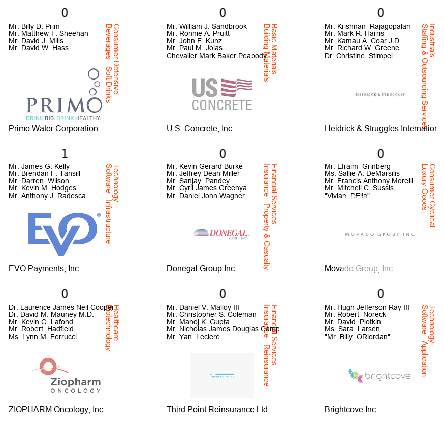

In [18]:
data.show_batch(rows=3, figsize=(7,6))

In [19]:
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [20]:
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.983162,1.260384,0.320000,00:05
1,1.203340,1.121781,0.240000,00:04
2,0.791793,1.094913,0.240000,00:04
3,0.568148,1.110837,0.260000,00:04


In [21]:
learn.save('stage-1')

In [22]:
interp = ClassificationInterpretation.from_learner(learn)

losses,idxs = interp.top_losses()

len(data.valid_ds)==len(losses)==len(idxs)

True

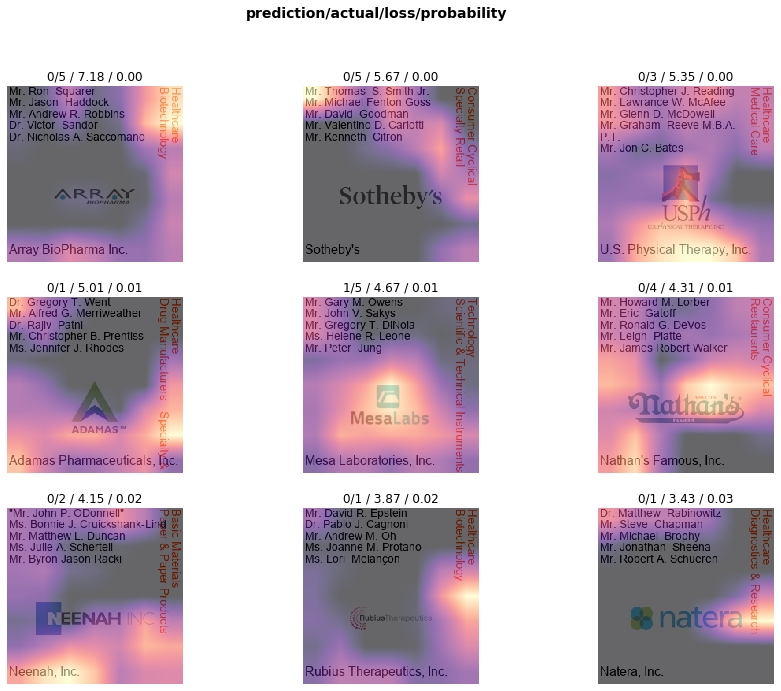

In [23]:
interp.plot_top_losses(9, figsize=(15,11))

In [24]:
doc(interp.plot_top_losses)

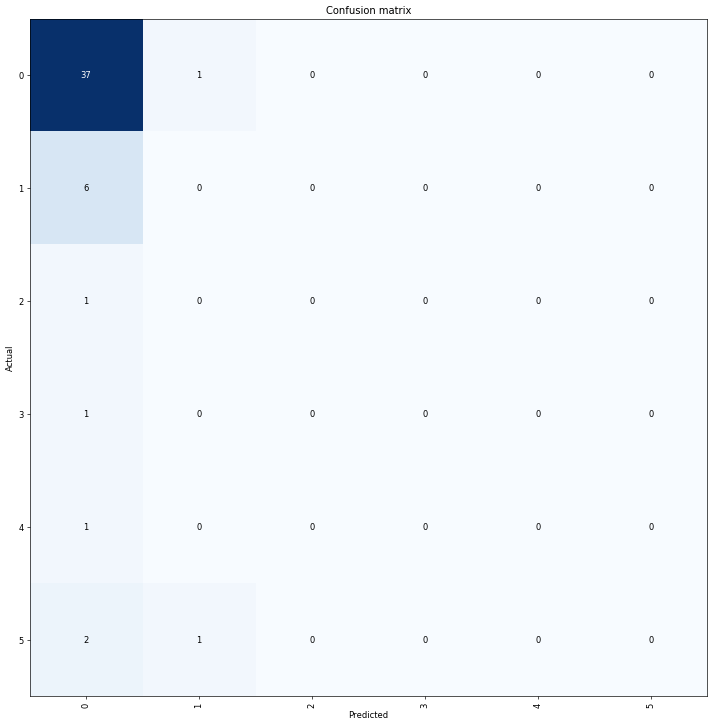

In [25]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [26]:
learn.unfreeze()

In [27]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,error_rate,time
0,0.617721,1.209110,0.240000,00:06


In [28]:
learn.load('stage-1');

In [29]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


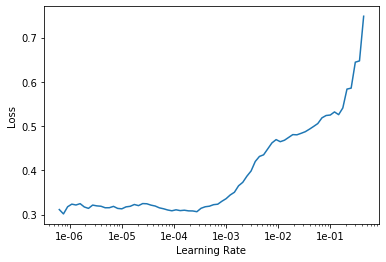

In [30]:
learn.recorder.plot()

In [31]:
learn.unfreeze()
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))

epoch,train_loss,valid_loss,error_rate,time
0,0.327297,1.129070,0.260000,00:05
1,0.314021,1.164410,0.280000,00:05
2,0.269472,1.145291,0.260000,00:05
3,0.232084,1.152055,0.240000,00:05
4,0.206723,1.160227,0.240000,00:05


In [ ]:
learn.fit_one_cycle(5, max_lr=slice(1e-6,1e-4))